In [2]:
import numpy as np
import pandas as pd
import scipy.signal
import functions
import structs
import operations
import importing
import entry
import counter
import plotting
import tests

import importlib

#function for hot reloading
def reload():

    #reimports modules, since anaconda caches the modules, which makes editing modules harder
    importlib.reload(structs)
    importlib.reload(operations)
    importlib.reload(functions)
    importlib.reload(importing)
    importlib.reload(entry)
    importlib.reload(counter)
    importlib.reload(plotting)
    importlib.reload(tests)

In [3]:
reload()

In [5]:
df = importing.import_csv('test_signals.csv')
sample = importing.extract_original_signal(df['X'])    
signal = df['Y']

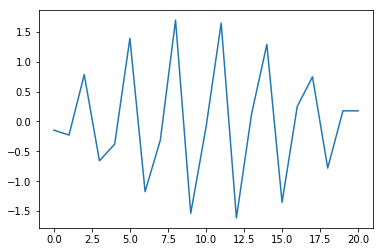

In [6]:
sample.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002CA0BA1D198>,
      dtype=object)

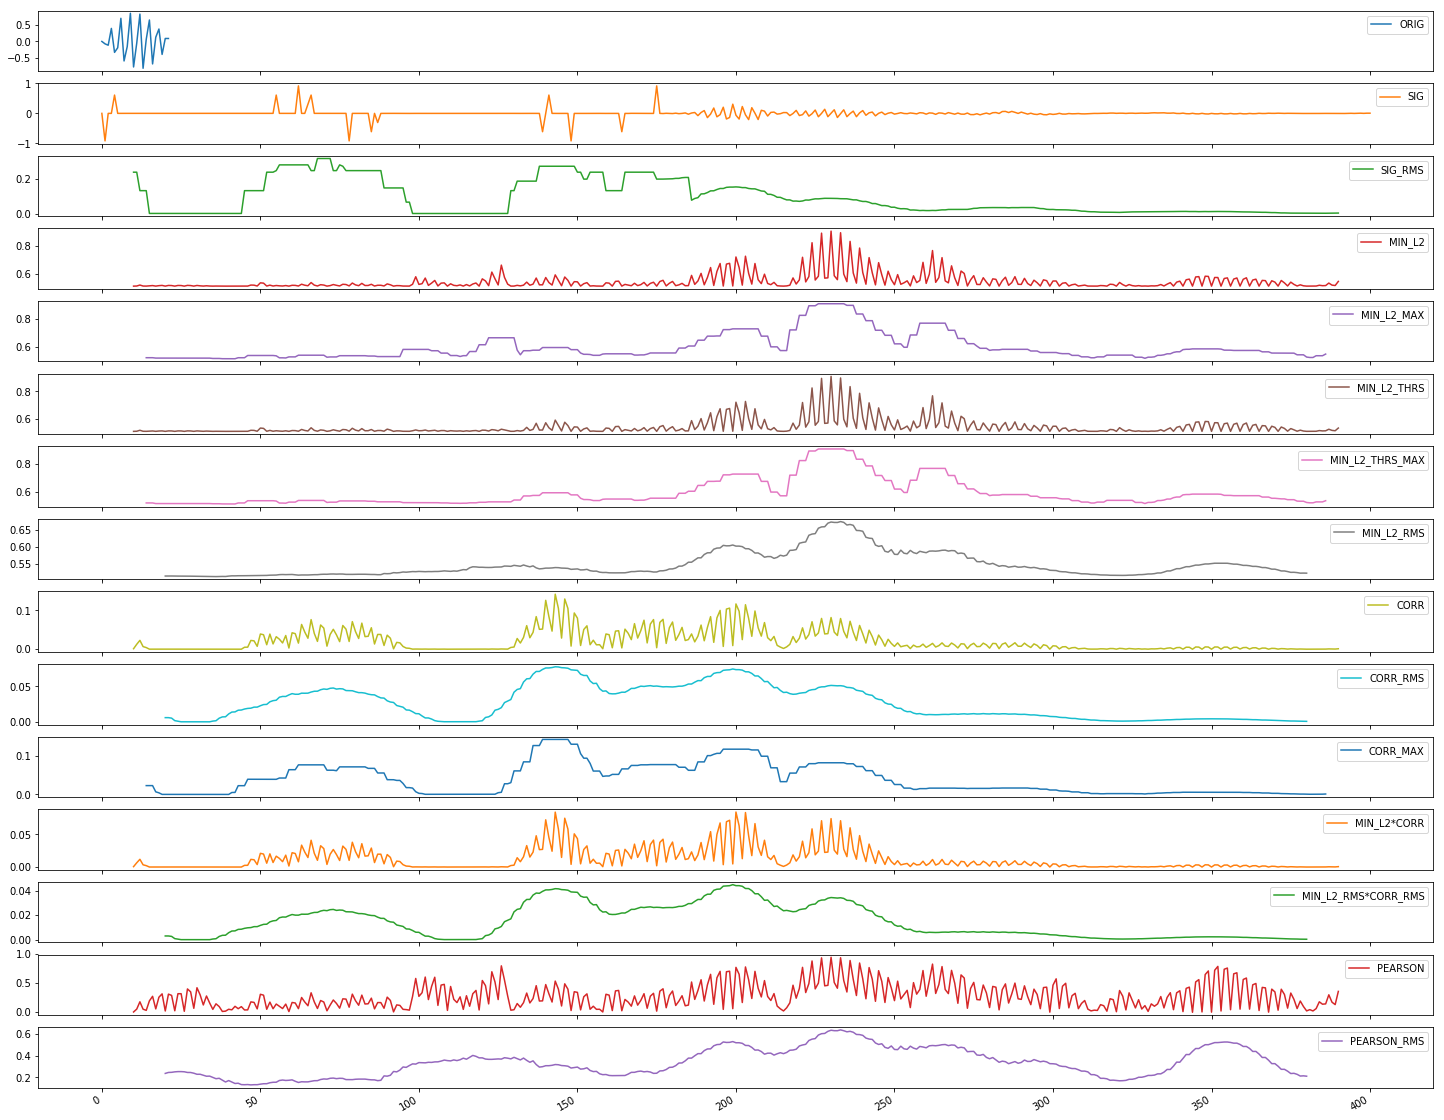

In [7]:
reload()

op = operations.SampleOperator(sample)

w_op_9 = operations.WindowOperator(9)

diff_rolling = pd.DataFrame()

diff_rolling['ORIG'] = df['X']
diff_rolling['SIG'] = signal
diff_rolling['SIG_RMS'] = op.apply_rms(signal)
diff_rolling['MIN_L2'] = functions.rbf(op.apply_min_error_L2(signal))
diff_rolling['MIN_L2_MAX'] = w_op_9.apply_max(diff_rolling['MIN_L2'])
diff_rolling['MIN_L2_THRS'] = functions.rbf(op.apply_min_error_L2_thresholded(signal))
diff_rolling['MIN_L2_THRS_MAX'] = w_op_9.apply_max(diff_rolling['MIN_L2_THRS'])

# diff_rolling['MIN_L2_MEAN'] = op.apply_mean(signal)
diff_rolling['MIN_L2_RMS'] = op.apply_rms(diff_rolling['MIN_L2'])

# diff_rolling['MINMAX'] = op.apply_min_max(diff_rolling['MIN_L2_RMS'])
# diff_rolling['MINMAX_MEAN'] = op.apply_mean(diff_rolling['MINMAX'])
diff_rolling['CORR'] = op.apply_cross_correlate(signal).abs()
diff_rolling['CORR_RMS'] = op.apply_rms(diff_rolling['CORR'])
diff_rolling['CORR_MAX'] = w_op_9.apply_max(diff_rolling['CORR'])

diff_rolling['MIN_L2*CORR'] = diff_rolling['MIN_L2'] * diff_rolling['CORR'].abs()
diff_rolling['MIN_L2_RMS*CORR_RMS'] = diff_rolling['MIN_L2_RMS'] * diff_rolling['CORR_RMS'].abs()
diff_rolling['PEARSON'] = op.apply_pearson(signal).abs()
diff_rolling['PEARSON_RMS'] = op.apply_rms(diff_rolling['PEARSON'])

# diff_rolling['SIG_MEAN'] = op.apply_mean(signal)
# diff_rolling['SIG-SIG_MEAN'] = signal-op.apply_mean(signal)
diff_rolling.plot(subplots=True, figsize = (25,22))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002CA0DD3DFD0>,
      dtype=object)

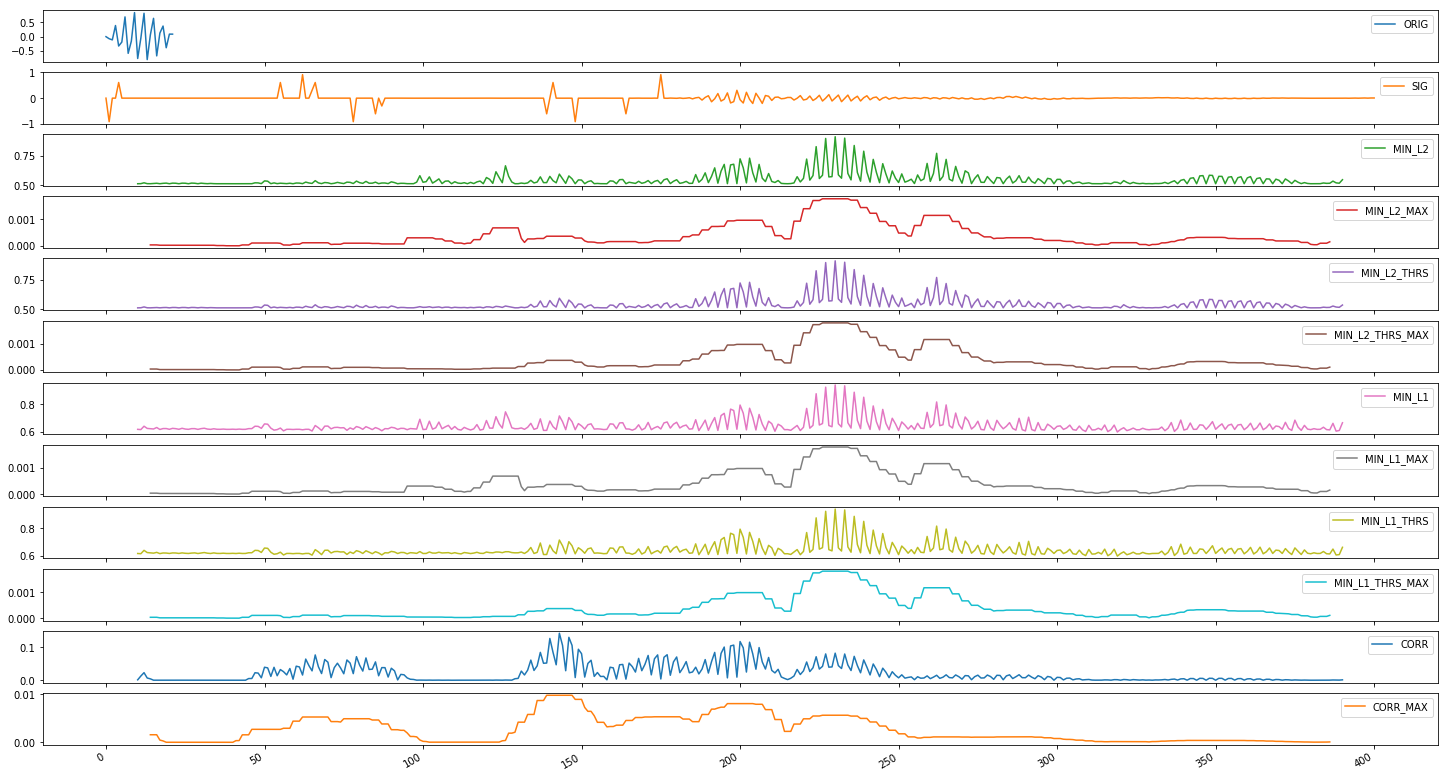

In [8]:
# hot reload
reload()

op = operations.SampleOperator(sample)

w_op_9 = operations.WindowOperator(9)

diff_rolling = pd.DataFrame()

#signal = 

diff_rolling['ORIG'] = df['X']
diff_rolling['SIG'] = signal

diff_rolling['MIN_L2'] = functions.rbf(op.apply_min_error_L2(signal))
diff_rolling['MIN_L2_MAX'] = functions.convert_to_PMF(w_op_9.apply_max(diff_rolling['MIN_L2']))

diff_rolling['MIN_L2_THRS'] = functions.rbf(op.apply_min_error_L2_thresholded(signal))
diff_rolling['MIN_L2_THRS_MAX'] = functions.convert_to_PMF(w_op_9.apply_max(diff_rolling['MIN_L2_THRS']))

diff_rolling['MIN_L1'] = functions.rbf(op.apply_min_error_L1(signal))
diff_rolling['MIN_L1_MAX'] = functions.convert_to_PMF(w_op_9.apply_max(diff_rolling['MIN_L2']))

diff_rolling['MIN_L1_THRS'] = functions.rbf(op.apply_min_error_L1_thresholded(signal))
diff_rolling['MIN_L1_THRS_MAX'] = functions.convert_to_PMF(w_op_9.apply_max(diff_rolling['MIN_L2_THRS']))


diff_rolling['CORR'] = op.apply_cross_correlate(signal).abs()
diff_rolling['CORR_MAX'] = functions.convert_to_PMF(w_op_9.apply_max(diff_rolling['CORR']))

diff_rolling.plot(subplots=True, figsize = (25,15))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B552308470>,
      dtype=object)

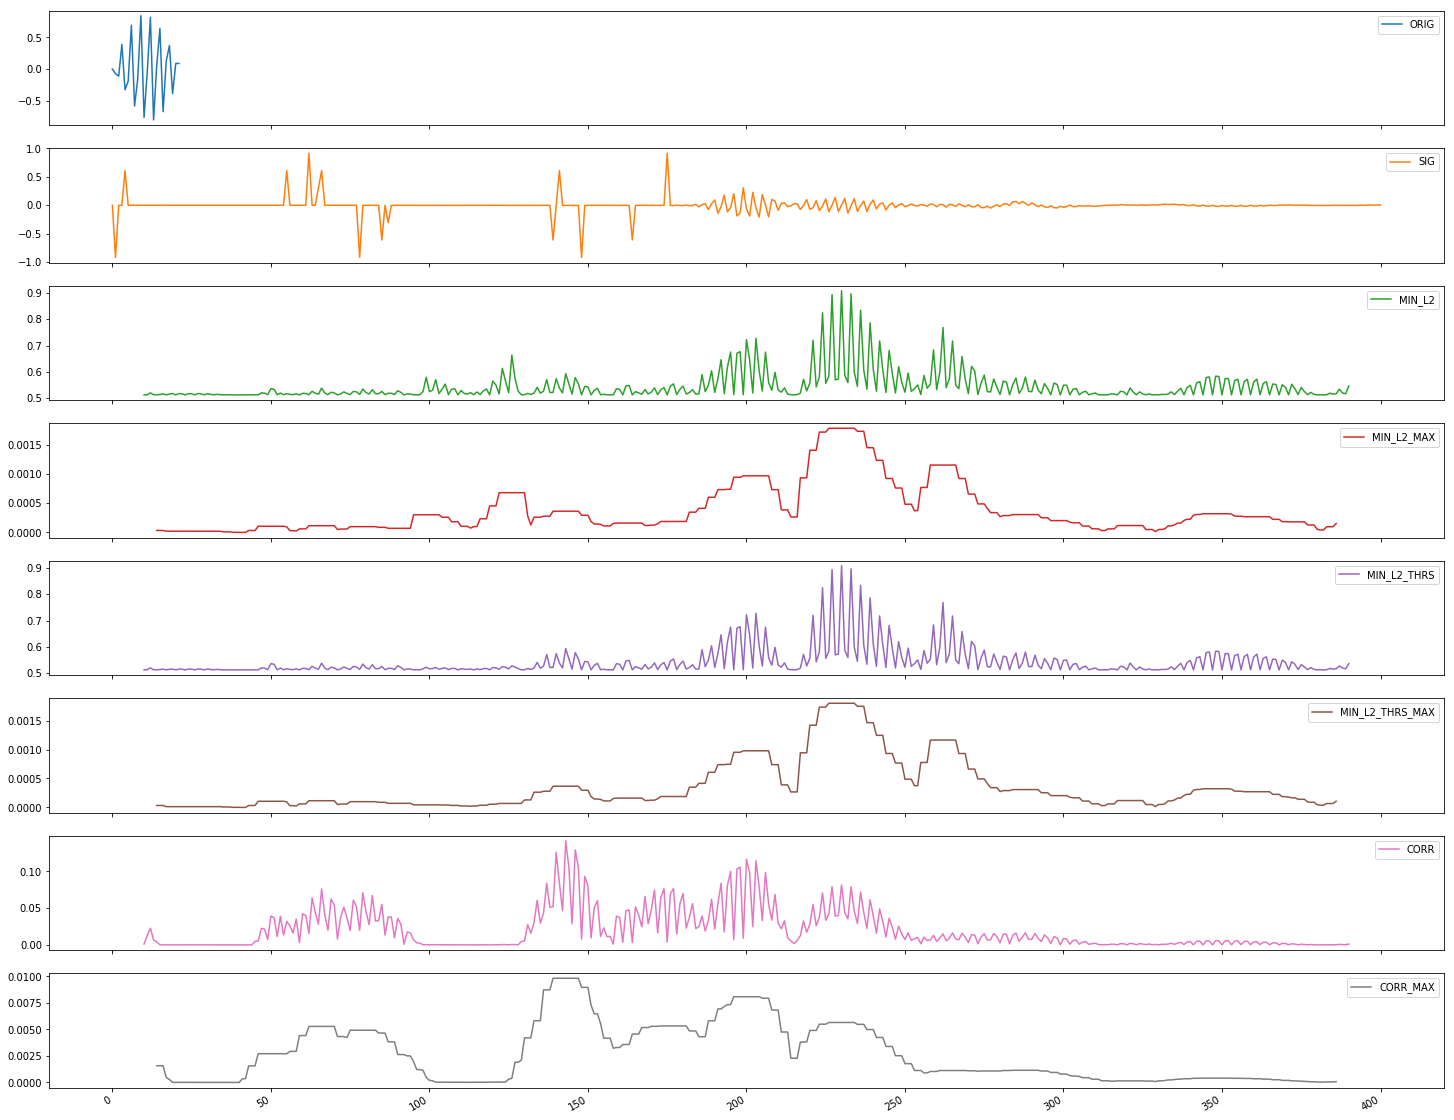

In [8]:
diff_rolling.plot(subplots=True, figsize = (25,22))


In [9]:
functions.find_extremas(diff_rolling['MIN_L2_MAX'])[3]

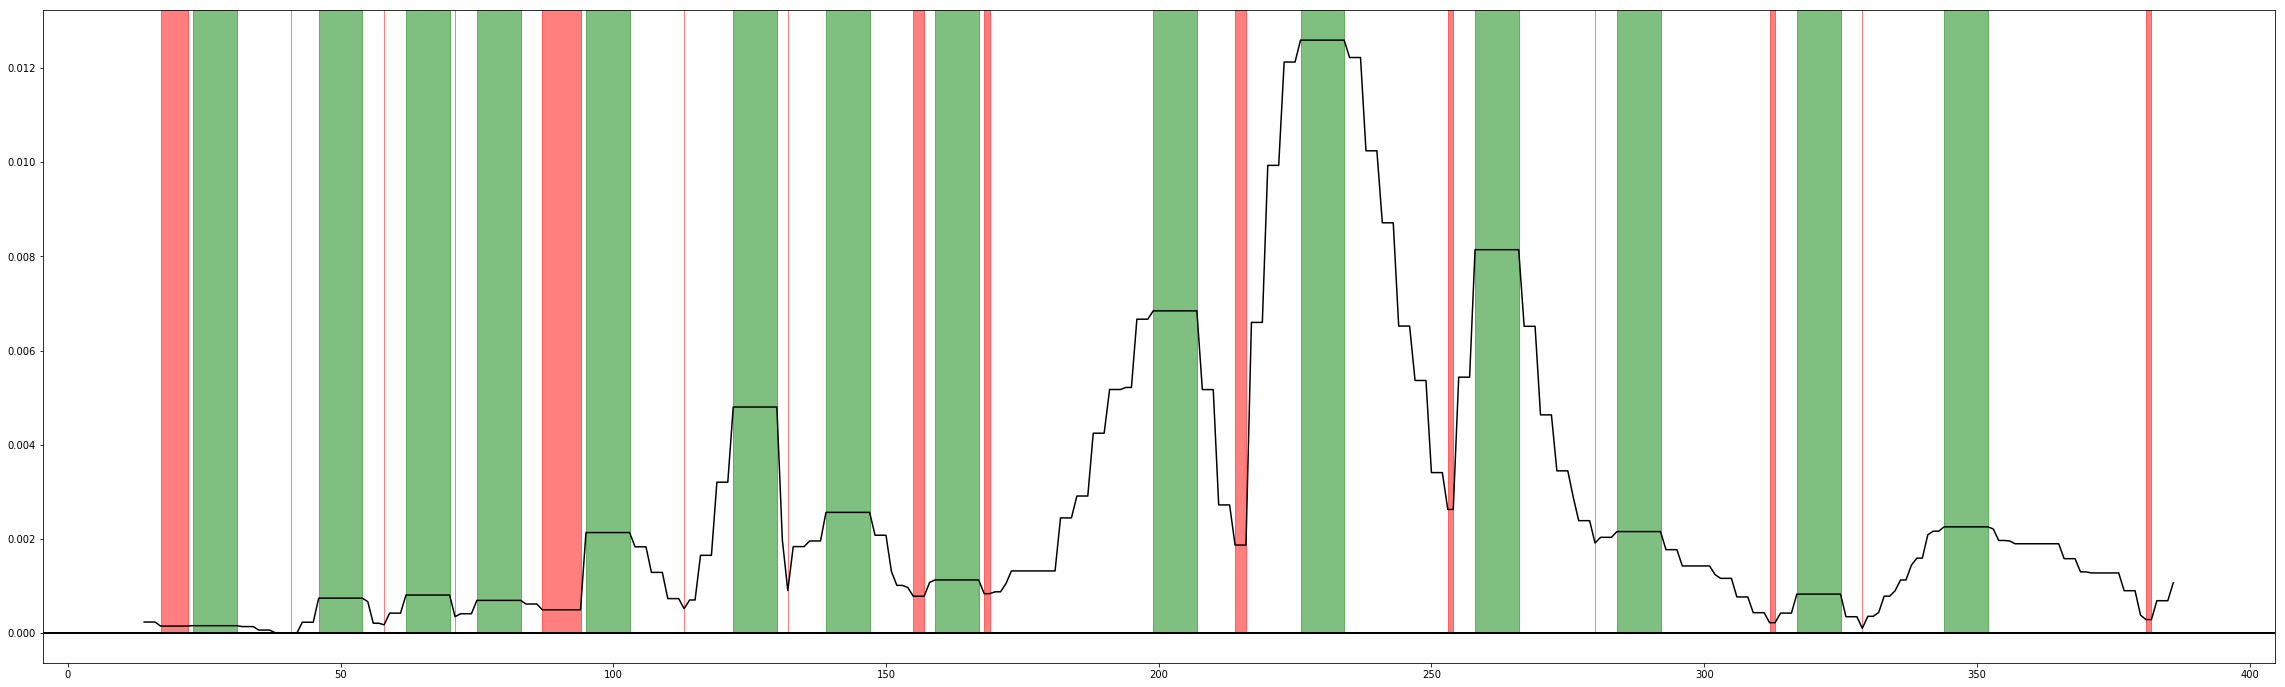


Count:
(7, [<structs.Extrema object at 0x000002B55136BEF0>, <structs.Extrema object at 0x000002B54FA58BA8>, <structs.Extrema object at 0x000002B551BF2278>, <structs.Extrema object at 0x000002B551AF4C50>, <structs.Extrema object at 0x000002B551AF4BE0>, <structs.Extrema object at 0x000002B55165CE10>, <structs.Extrema object at 0x000002B5516CD2B0>])


In [10]:
reload() 

import matplotlib.pyplot as plt
import matplotlib.collections as collections

pmf = functions.convert_to_PMF(diff_rolling['MIN_L2_MAX'])
extrema = functions.find_extremas(pmf)
    
plotting.plot_extrema(pmf, extrema)
    
#print(len(extrema[2]))
#print("\n")

c = functions.count_maximums(pmf, extrema)

print("\nCount:")
print(c)


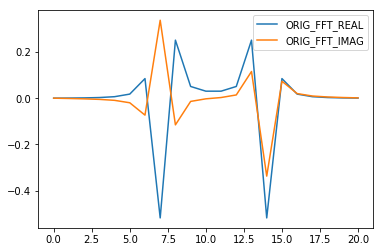

In [11]:
orig_df = pd.DataFrame()

orig_df['ORIG']      = sample
orig_df['ORIG_FFT']  = scipy.fftpack.fft(sample) * (1/len(sample))
orig_df['ORIG_FFT_REAL'] = orig_df['ORIG_FFT'].real
orig_df['ORIG_FFT_IMAG'] = orig_df['ORIG_FFT'].imag
orig_df[['ORIG_FFT_REAL', 'ORIG_FFT_IMAG']].plot()


In [12]:
half_win = len(sample)//2

fft_window = pd.DataFrame()

window = scipy.signal.windows.hann(len(sample))

for window_center in range(half_win, len(signal) - half_win):
    
    win_start = window_center - half_win
    win_end = window_center + half_win + 1
    
    samples = signal[win_start:win_end] * window
    
    # there are complex numbers
    result = scipy.fftpack.fft(samples) * (1/len(signal))
    fft_window[window_center] = np.abs(result)
    

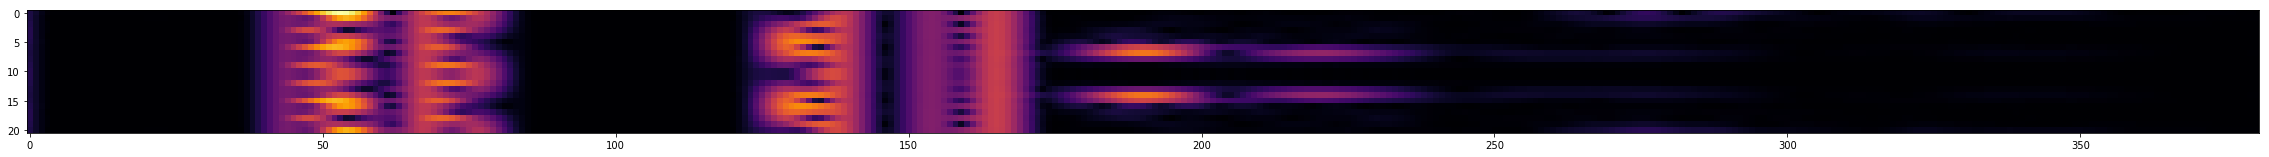

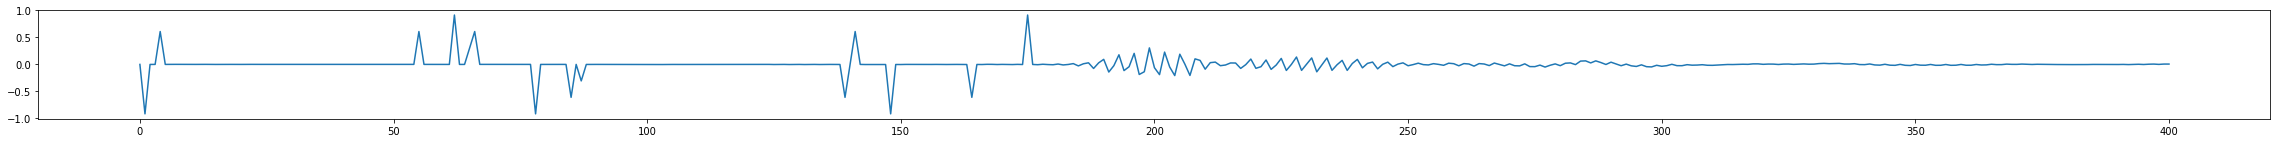

In [13]:
#import plotly.plotly as py
#import plotly.tools as tls

import matplotlib.pyplot as plt

# plt.plot(legend=False, figsize=(30,20))

fig = plt.figure(figsize=(40,5))

# plotting power spectrum
plt.imshow(fft_window, cmap='inferno', interpolation='nearest', resample=False)
plt.show()

df['Y'].plot(figsize=(40,2))

In [ ]:
#reload()
#add_sine(diff_rolling['MIN_L2_MAX'], 0.25, 1/32).plot()

Starting main..

Data loaded

Running tests:
ORIGINAL:
unified_count: 2.0, sub_counts:{'MIN_L2_THRS_MAX': 2, 'MIN_L1_THRS_MAX': 2, 'CORR_MAX': 3}
nn_count:2.0, nn_sub_count:{'MIN_L2_THRS_MAX': 2, 'MIN_L1_THRS_MAX': 2, 'CORR_MAX': 2}



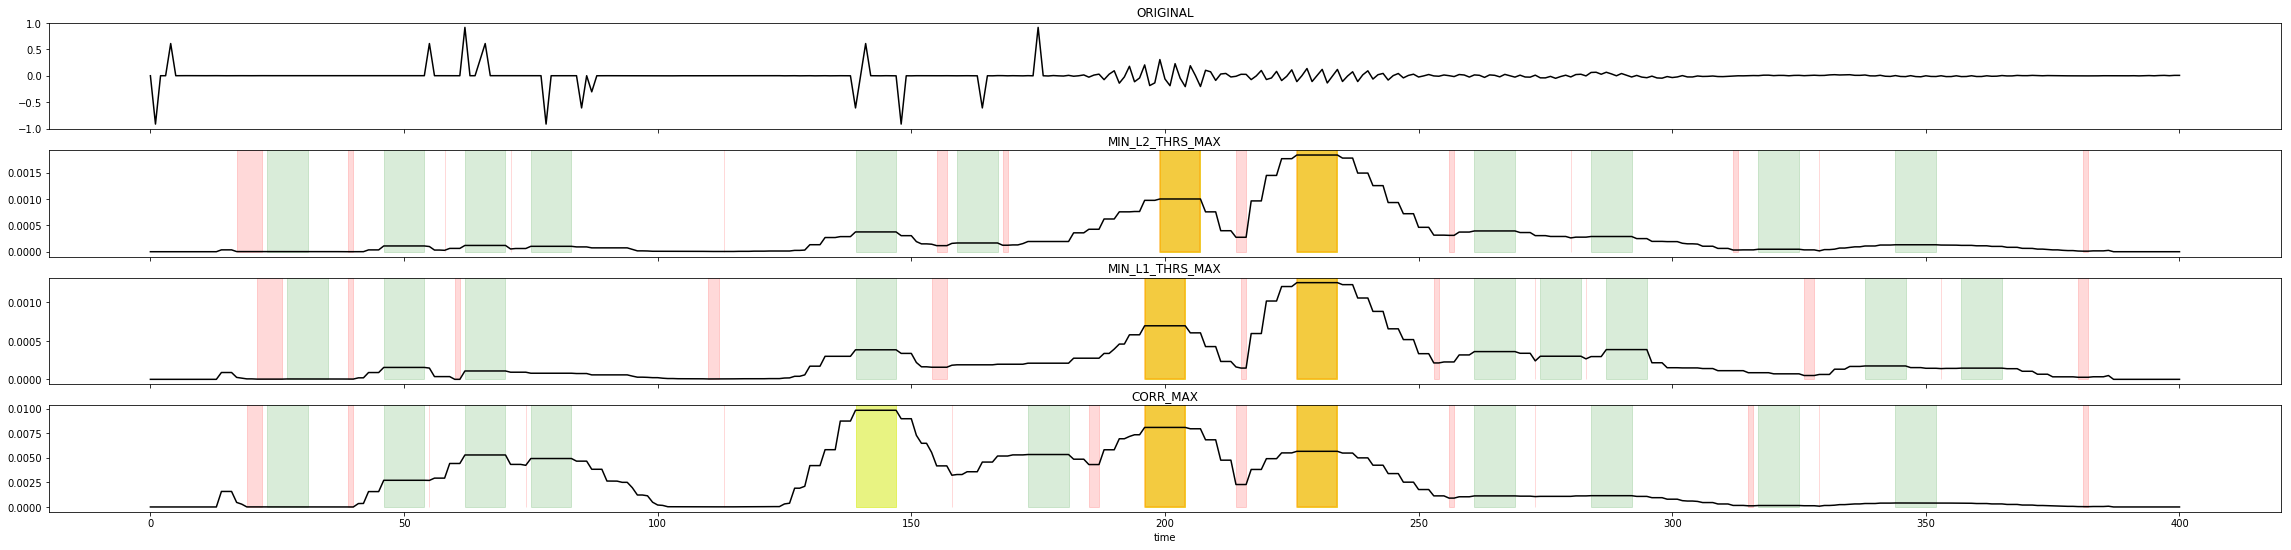

ORIGINAL_INVERTED:
unified_count: 2.0, sub_counts:{'MIN_L2_THRS_MAX': 2, 'MIN_L1_THRS_MAX': 2, 'CORR_MAX': 3}
nn_count:2.0, nn_sub_count:{'MIN_L2_THRS_MAX': 2, 'MIN_L1_THRS_MAX': 2, 'CORR_MAX': 2}



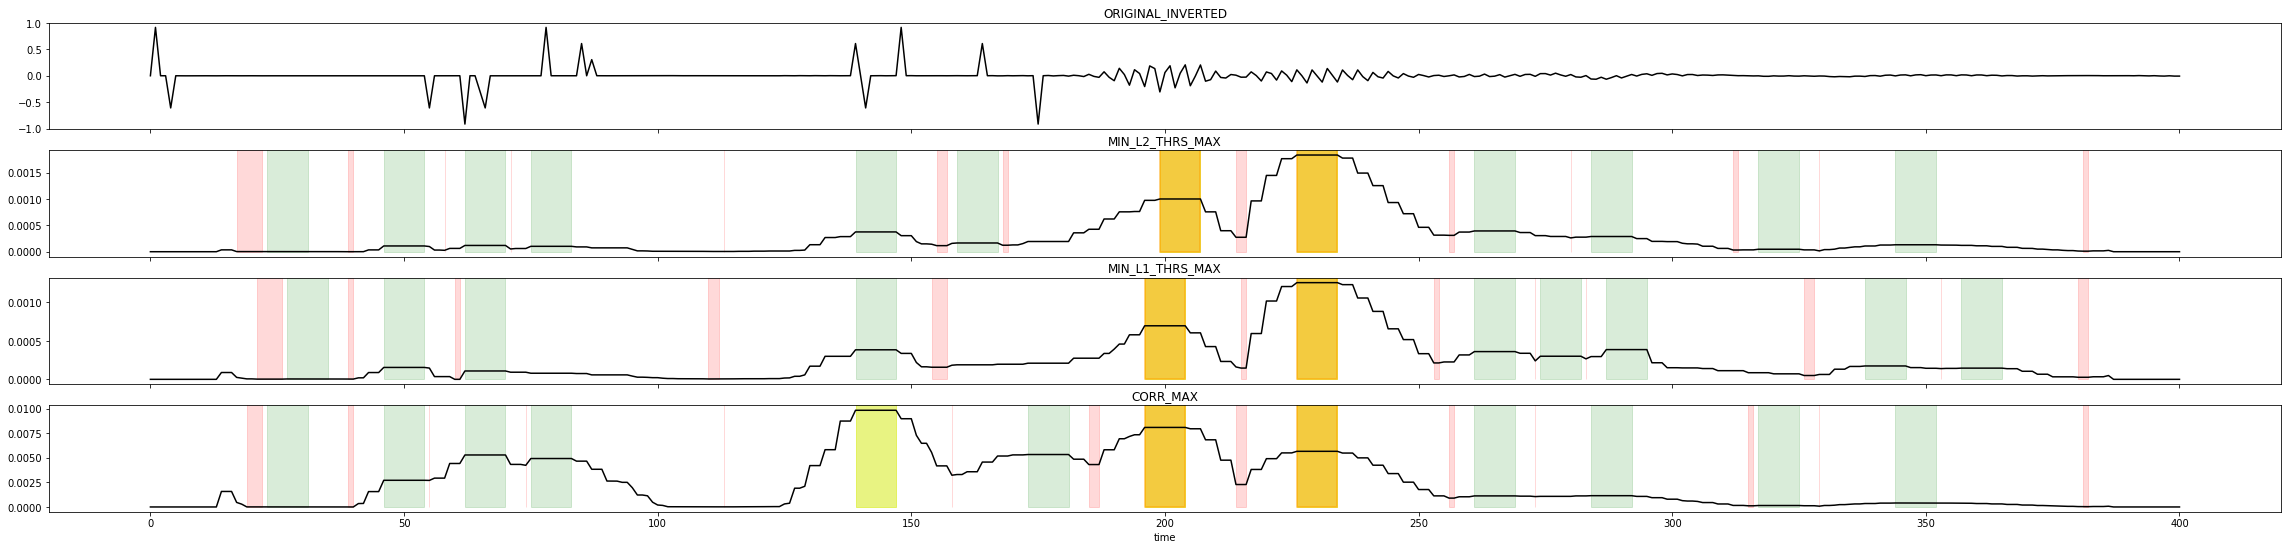

GAUSS_5%_0:
unified_count: 2.0, sub_counts:{'MIN_L2_THRS_MAX': 2, 'MIN_L1_THRS_MAX': 2, 'CORR_MAX': 3}
nn_count:2.0, nn_sub_count:{'MIN_L2_THRS_MAX': 2, 'MIN_L1_THRS_MAX': 2, 'CORR_MAX': 2}



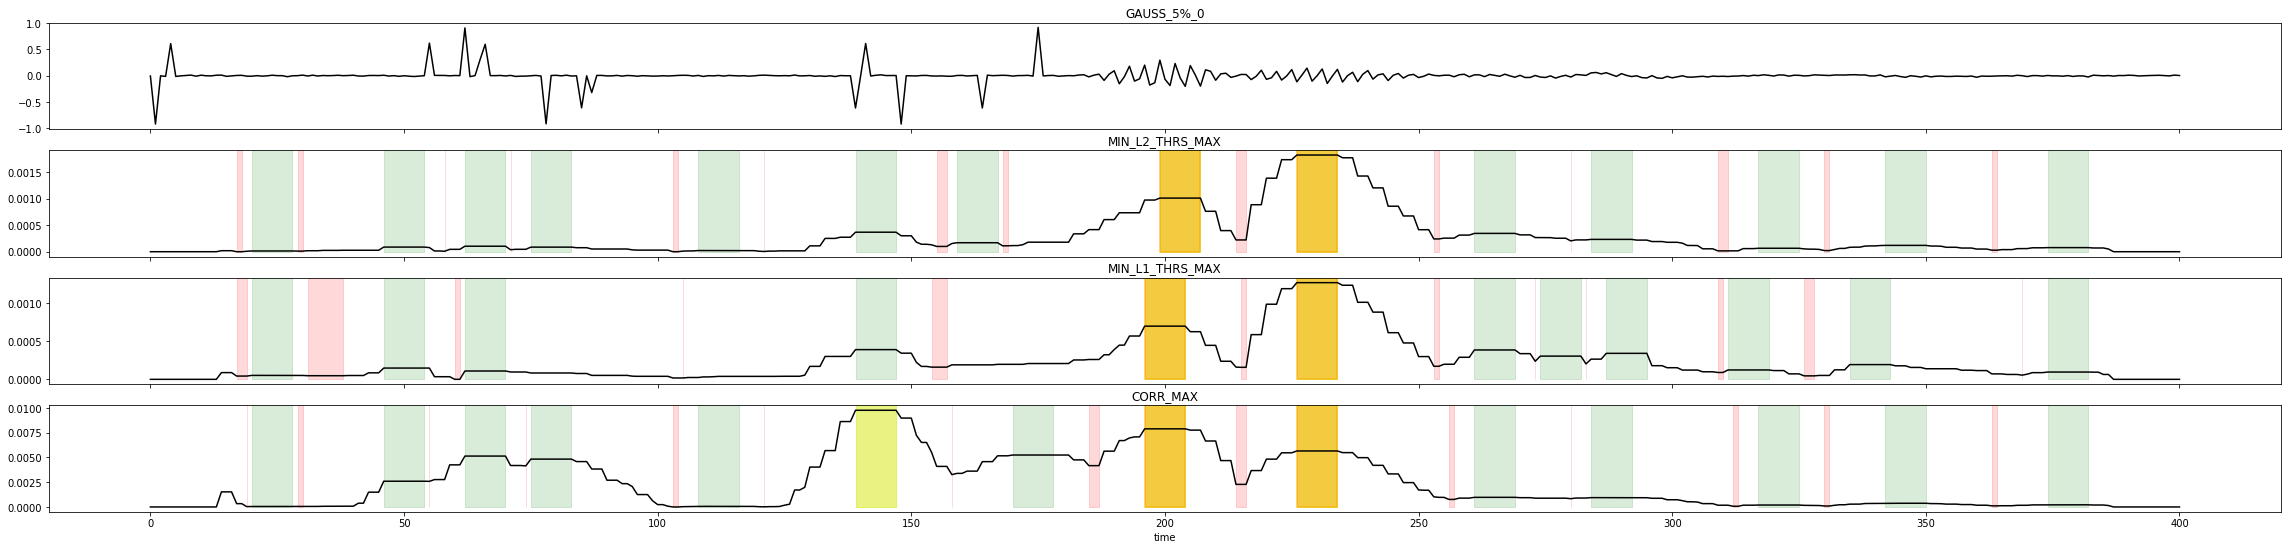

GAUSS_5%_1:
unified_count: 2.0, sub_counts:{'MIN_L2_THRS_MAX': 2, 'MIN_L1_THRS_MAX': 2, 'CORR_MAX': 3}
nn_count:2.0, nn_sub_count:{'MIN_L2_THRS_MAX': 2, 'MIN_L1_THRS_MAX': 2, 'CORR_MAX': 2}



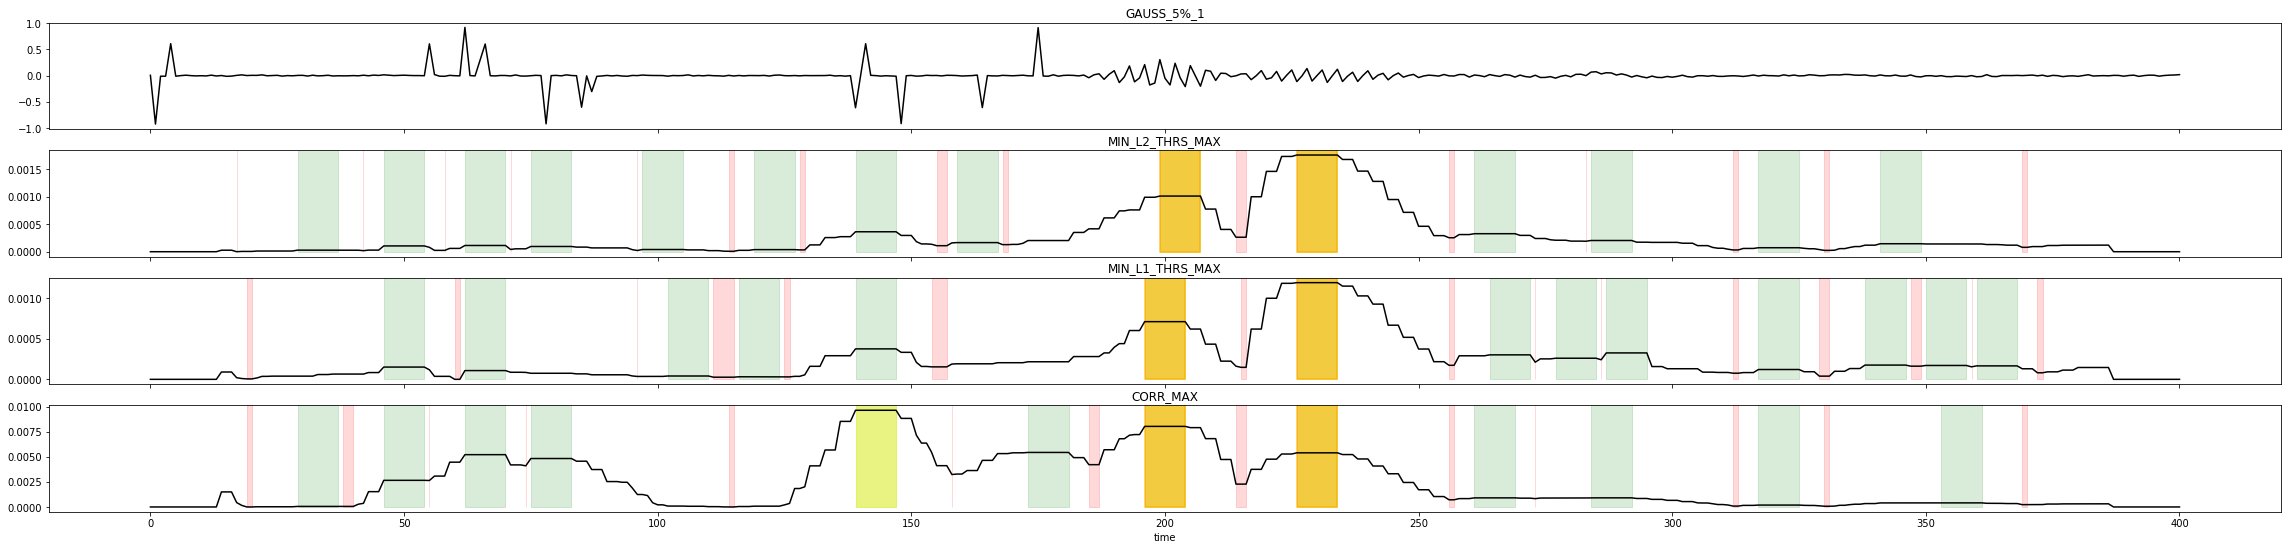

GAUSS_5%_2:
unified_count: 2.0, sub_counts:{'MIN_L2_THRS_MAX': 2, 'MIN_L1_THRS_MAX': 2, 'CORR_MAX': 3}
nn_count:2.0, nn_sub_count:{'MIN_L2_THRS_MAX': 2, 'MIN_L1_THRS_MAX': 2, 'CORR_MAX': 2}



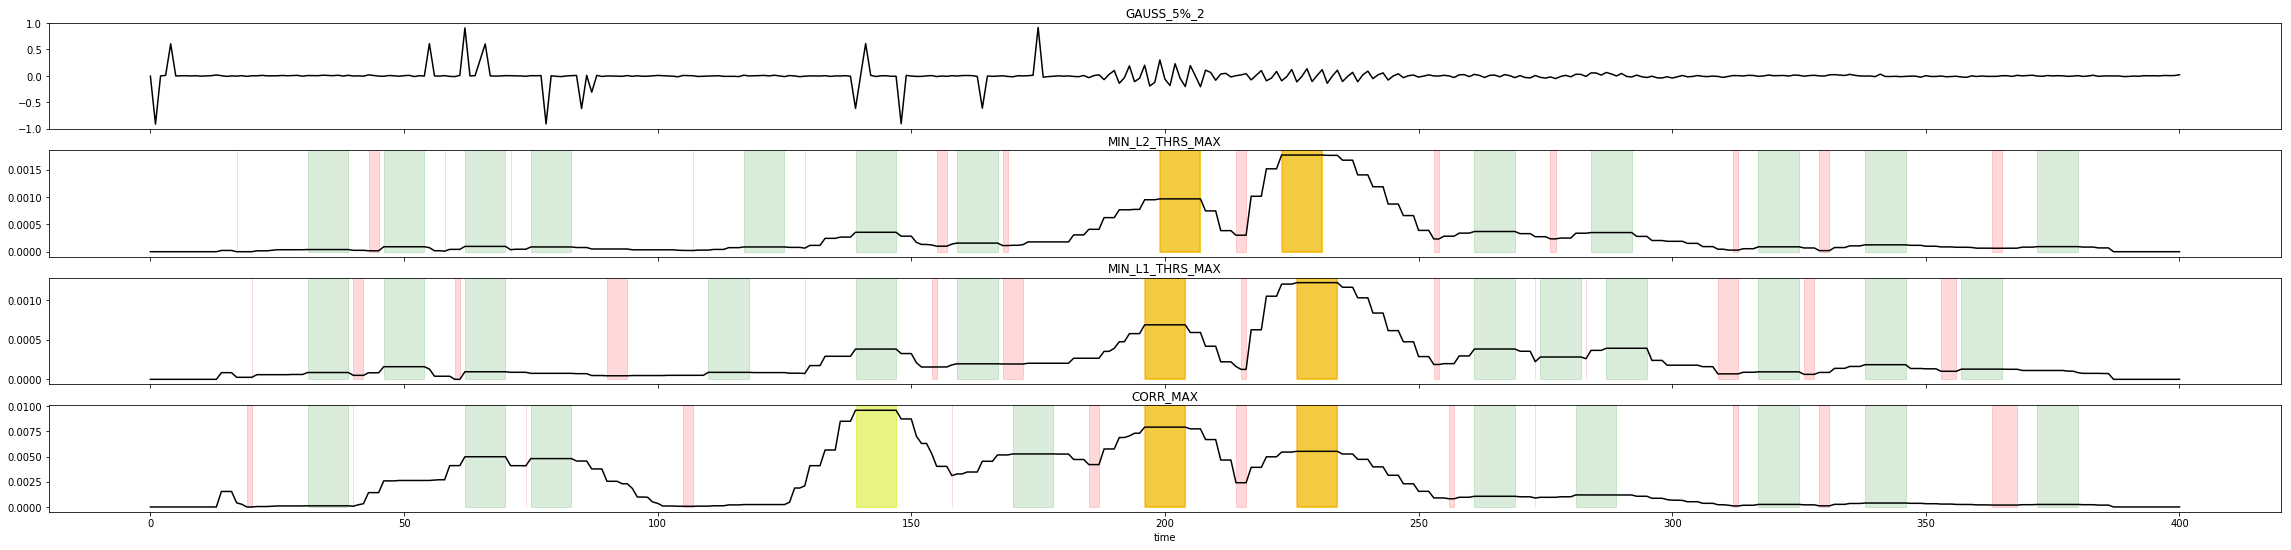

GAUSS_10%_0:
unified_count: 2.0, sub_counts:{'MIN_L2_THRS_MAX': 2, 'MIN_L1_THRS_MAX': 2, 'CORR_MAX': 3}
nn_count:2.0, nn_sub_count:{'MIN_L2_THRS_MAX': 2, 'MIN_L1_THRS_MAX': 2, 'CORR_MAX': 2}



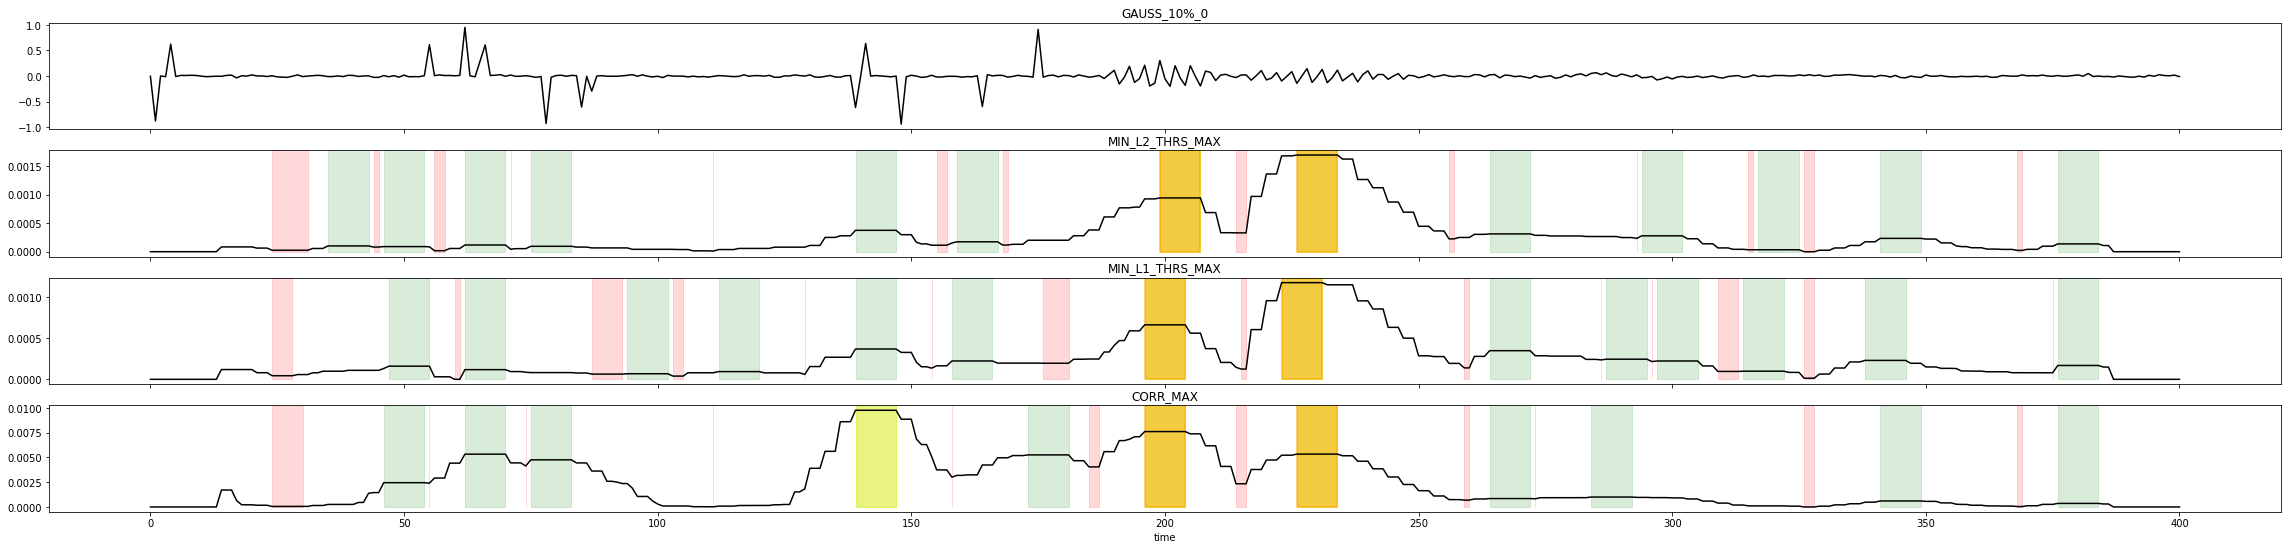

GAUSS_10%_1:
unified_count: 3.0, sub_counts:{'MIN_L2_THRS_MAX': 2, 'MIN_L1_THRS_MAX': 3, 'CORR_MAX': 3}
nn_count:3.0, nn_sub_count:{'MIN_L2_THRS_MAX': 2, 'MIN_L1_THRS_MAX': 3, 'CORR_MAX': 3}



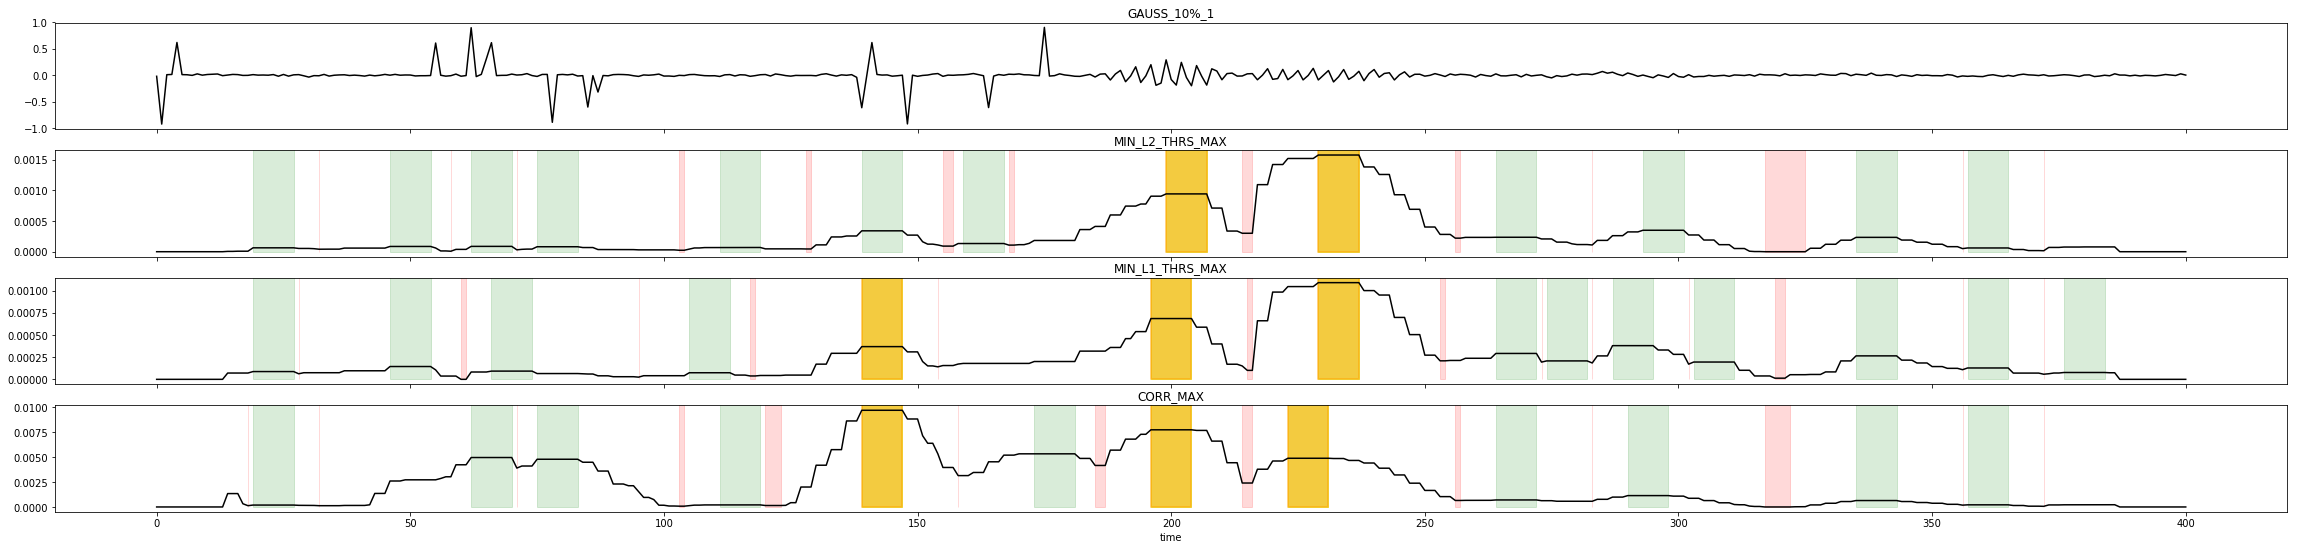

GAUSS_10%_2:
unified_count: 2.0, sub_counts:{'MIN_L2_THRS_MAX': 2, 'MIN_L1_THRS_MAX': 2, 'CORR_MAX': 3}
nn_count:2.0, nn_sub_count:{'MIN_L2_THRS_MAX': 2, 'MIN_L1_THRS_MAX': 2, 'CORR_MAX': 2}



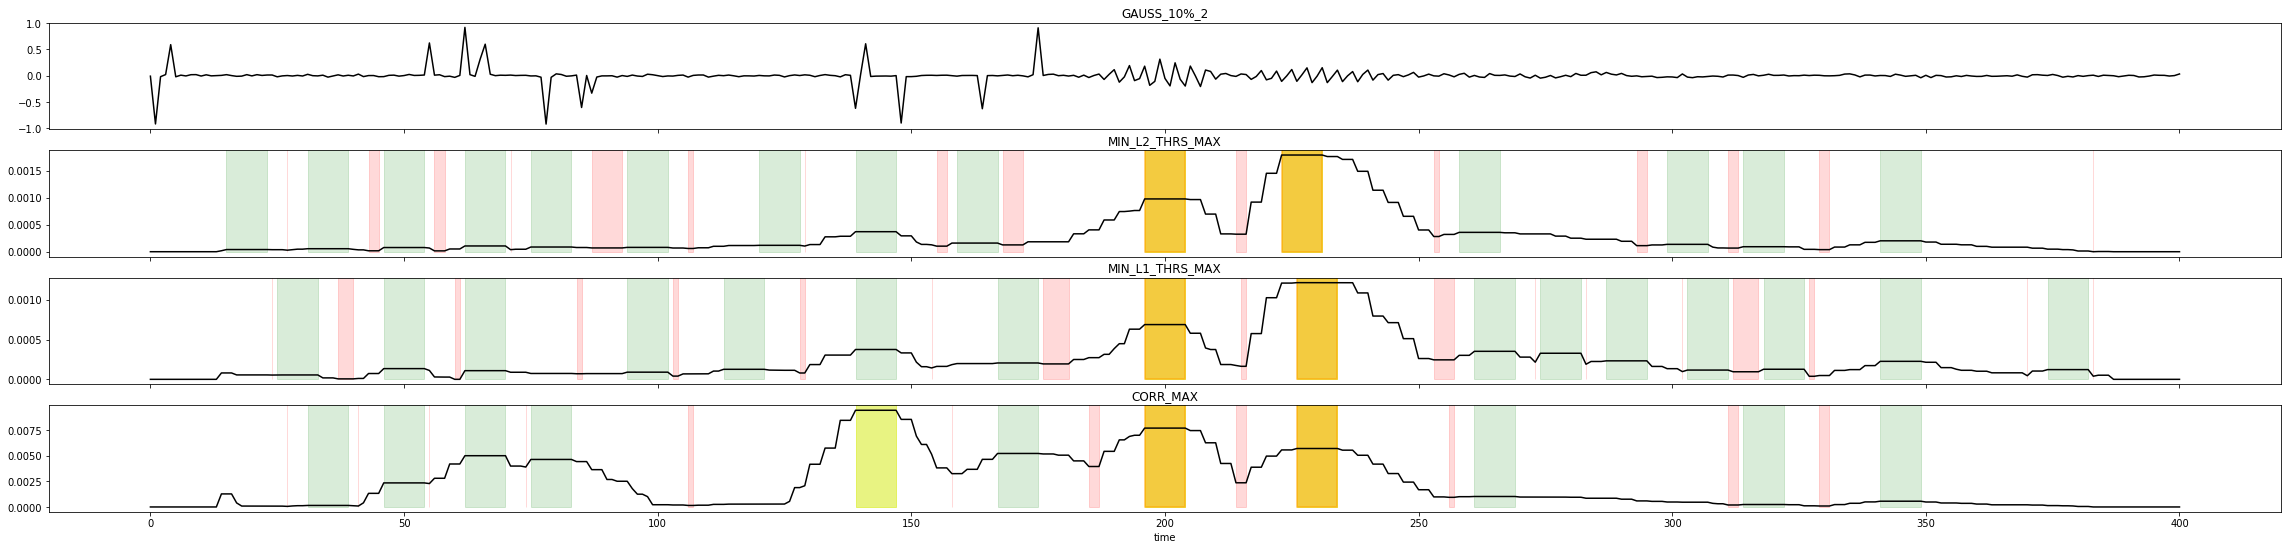

GAUSS_25%_0:
unified_count: 2.0, sub_counts:{'MIN_L2_THRS_MAX': 2, 'MIN_L1_THRS_MAX': 2, 'CORR_MAX': 3}
nn_count:2.0, nn_sub_count:{'MIN_L2_THRS_MAX': 2, 'MIN_L1_THRS_MAX': 2, 'CORR_MAX': 2}



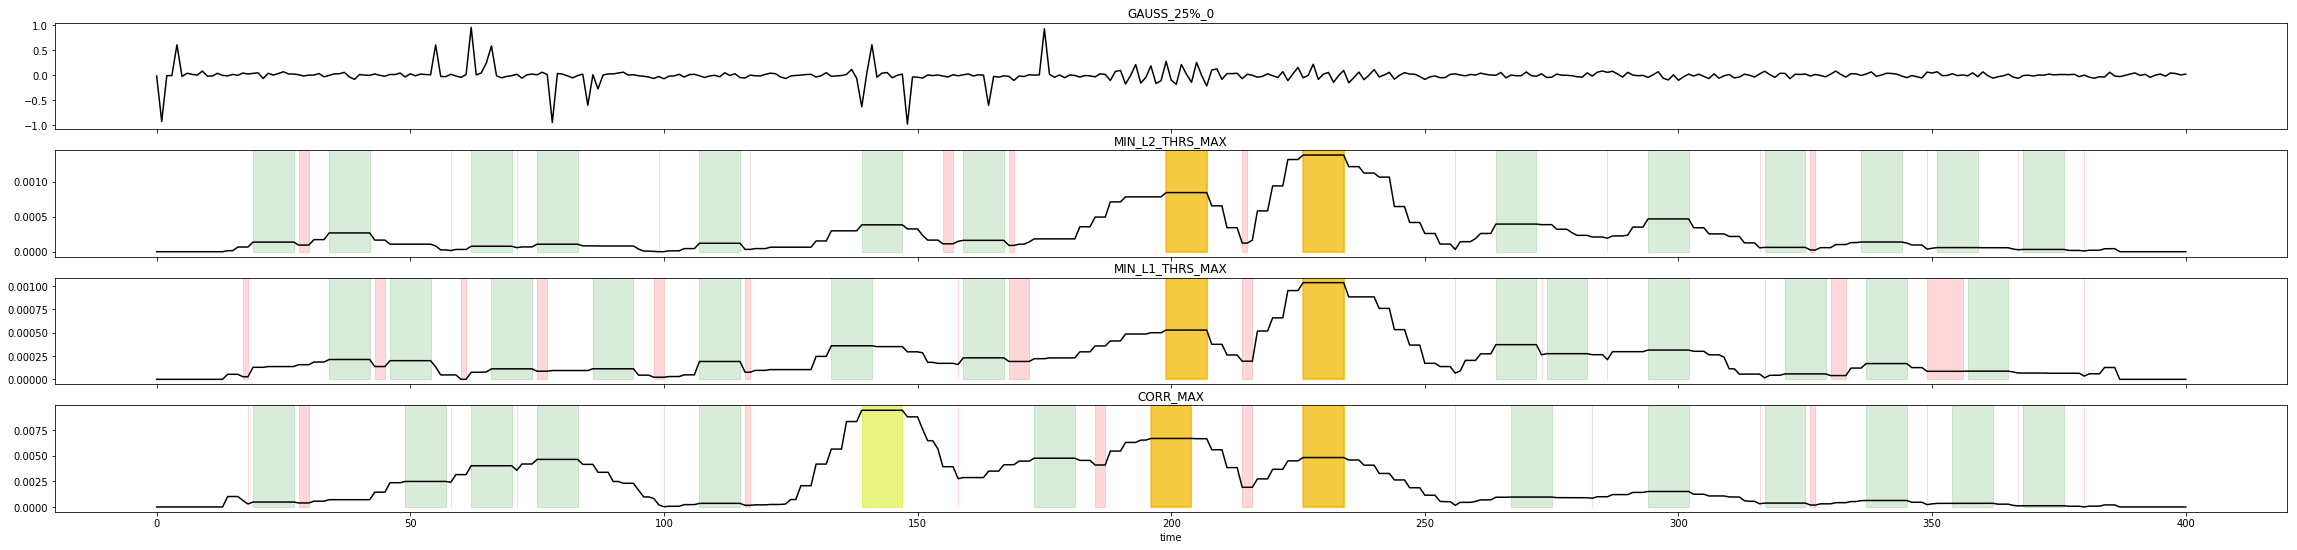

GAUSS_25%_1:
unified_count: 3.0, sub_counts:{'MIN_L2_THRS_MAX': 2, 'MIN_L1_THRS_MAX': 4, 'CORR_MAX': 3}
nn_count:3.0, nn_sub_count:{'MIN_L2_THRS_MAX': 2, 'MIN_L1_THRS_MAX': 3, 'CORR_MAX': 3}



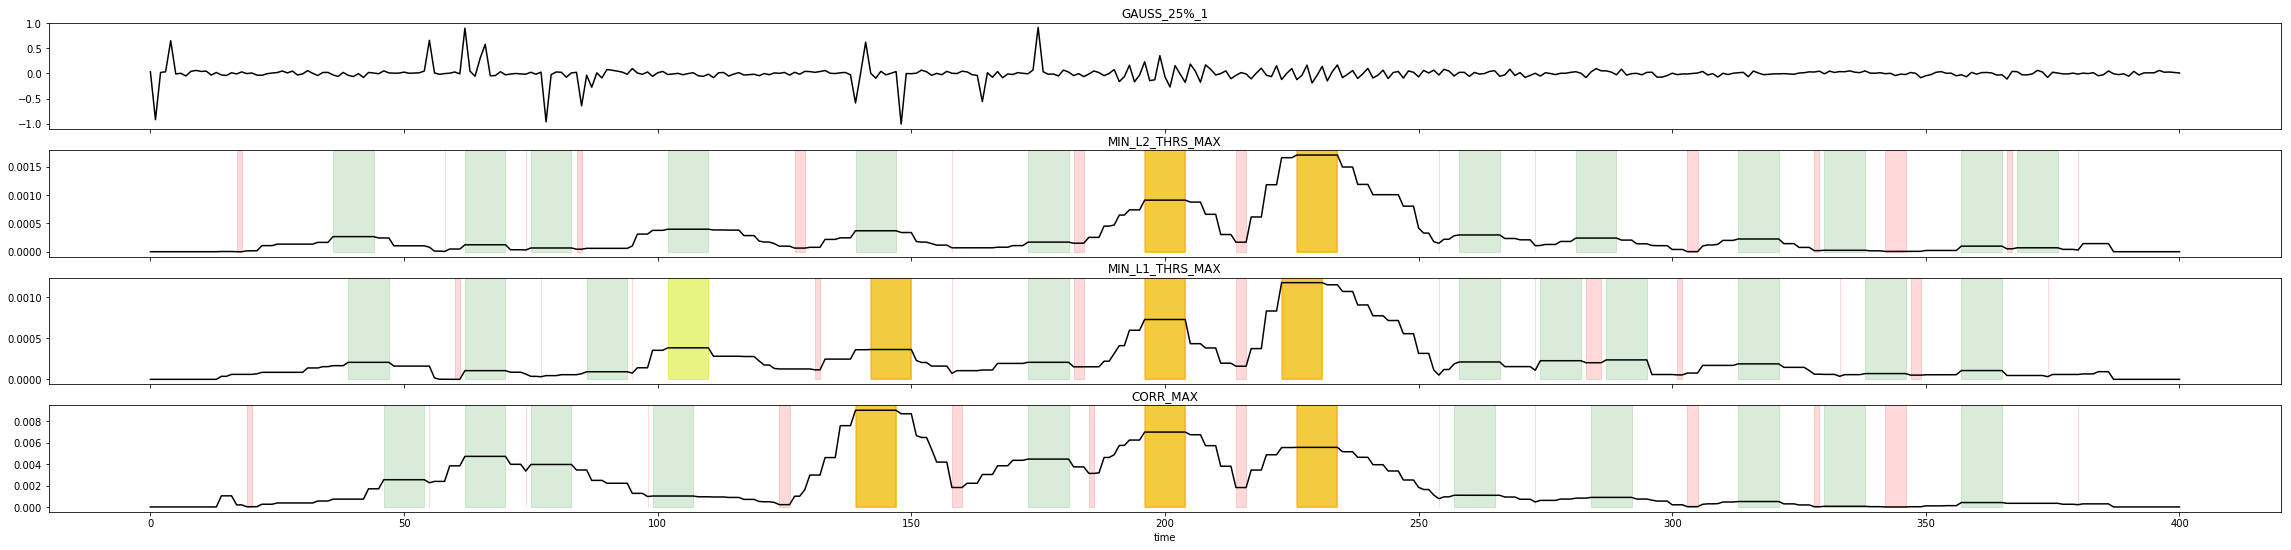

GAUSS_25%_2:
unified_count: 2.0, sub_counts:{'MIN_L2_THRS_MAX': 2, 'MIN_L1_THRS_MAX': 2, 'CORR_MAX': 4}
nn_count:2.0, nn_sub_count:{'MIN_L2_THRS_MAX': 2, 'MIN_L1_THRS_MAX': 2, 'CORR_MAX': 2}



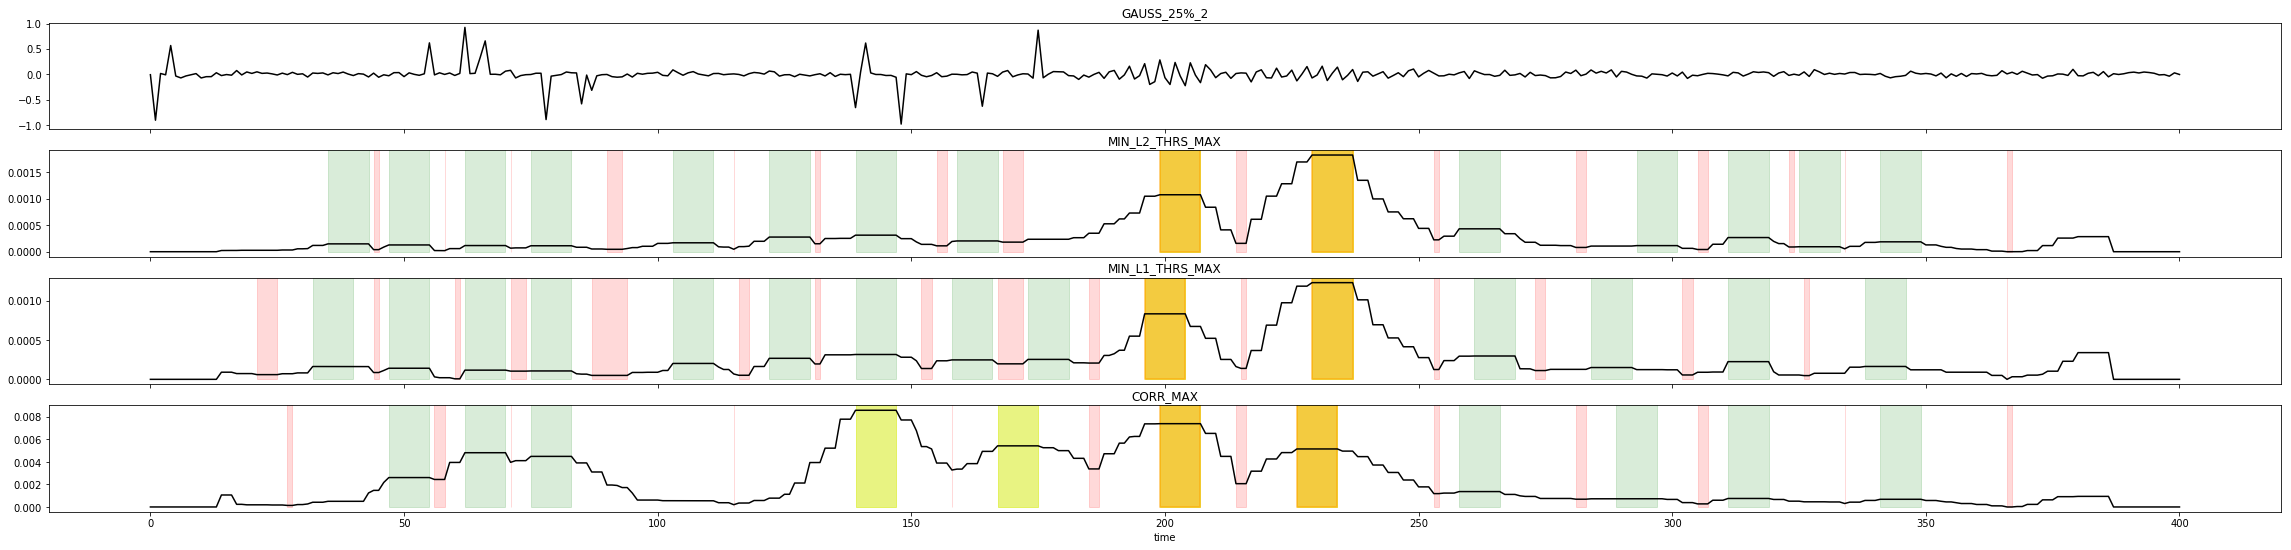

REPEATED:
unified_count: 40.0, sub_counts:{'MIN_L2_THRS_MAX': 40, 'MIN_L1_THRS_MAX': 40, 'CORR_MAX': 40}
nn_count:40.0, nn_sub_count:{'MIN_L2_THRS_MAX': 40, 'MIN_L1_THRS_MAX': 40, 'CORR_MAX': 40}

REPEATED_INVERTED:
unified_count: 40.0, sub_counts:{'MIN_L2_THRS_MAX': 40, 'MIN_L1_THRS_MAX': 40, 'CORR_MAX': 40}
nn_count:40.0, nn_sub_count:{'MIN_L2_THRS_MAX': 40, 'MIN_L1_THRS_MAX': 40, 'CORR_MAX': 40}

RPTD_GAUSS_10%_0:
unified_count: 40.0, sub_counts:{'MIN_L2_THRS_MAX': 40, 'MIN_L1_THRS_MAX': 40, 'CORR_MAX': 40}
nn_count:40.0, nn_sub_count:{'MIN_L2_THRS_MAX': 40, 'MIN_L1_THRS_MAX': 40, 'CORR_MAX': 40}

RPTD_GAUSS_10%_1:
unified_count: 40.0, sub_counts:{'MIN_L2_THRS_MAX': 40, 'MIN_L1_THRS_MAX': 40, 'CORR_MAX': 40}
nn_count:40.0, nn_sub_count:{'MIN_L2_THRS_MAX': 40, 'MIN_L1_THRS_MAX': 40, 'CORR_MAX': 40}

RPTD_GAUSS_10%_2:
unified_count: 40.0, sub_counts:{'MIN_L2_THRS_MAX': 40, 'MIN_L1_THRS_MAX': 40, 'CORR_MAX': 40}
nn_count:40.0, nn_sub_count:{'MIN_L2_THRS_MAX': 40, 'MIN_L1_THRS_MAX': 40,

In [12]:
reload()
entry.main()